# Анализ продажи в e-commerce

## Импортируемые библиотеки

In [1]:
import pandas as pd
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from calendar import monthrange

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Настройки для графиков 

In [85]:
sns.set(
    font_scale =1.3,
    style      ="whitegrid",
    rc         ={'figure.figsize':(18,8)}
)

# Разведывательный анализ данных, описание структуры данных

# Таблица 1. 
**olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**
- customer_id — позаказный идентификатор пользователя
- customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
- customer_zip_code_prefix —  почтовый индекс пользователя
- customer_city —  город доставки пользователя
- customer_state —  штат доставки пользователя

In [5]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Смотрим тип данных в таблице, наличие пропущенных значений, а также размеры дата фрейма:**

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Проверка на дубликаты:**

In [7]:
customers.loc[customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


дубликатов значений нет

# Таблица 2. 
**olist_orders_dataset.csv —  таблица заказов**
- order_id —  уникальный идентификатор заказа (номер чека)
- customer_id —  позаказный идентификатор пользователя
- order_status —  статус заказа
- order_purchase_timestamp —  время создания заказа
- order_approved_at —  время подтверждения оплаты заказа
- order_delivered_carrier_date —  время передачи заказа в логистическую службу
- order_delivered_customer_date —  время доставки заказа
- order_estimated_delivery_date —  обещанная дата доставки

In [8]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw',
                     parse_dates=['order_purchase_timestamp',
                                  'order_approved_at',
                                  'order_delivered_carrier_date',
                                  'order_delivered_customer_date',
                                  'order_estimated_delivery_date'])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Смотрим пример заказов со статусом "approved"**

In [10]:
orders.loc[orders.order_status == "approved"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


**Смотрим тип данных в таблице, наличие пропущенных значений, а также размеры дата фрейма:**

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Изучаем данные на наличие пропущенных значений:**

In [14]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Считаем сколько раз в датафрейме повторяется каждый статус:

In [15]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Считаем заказы с каким статусом имеют пропущенные значения в столбце со временем подтверждения оплаты, а также количество пропущенных значений для каждого статуса:

In [16]:
orders[orders.order_approved_at.isna()].order_status.value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

Считаем заказы с каким статусом имеют пропущенные значения в столбце со временем передачи заказа в логистическую службу, а также количество пропущенных значений для каждого статуса: 

In [17]:
orders[orders.order_delivered_carrier_date.isna()].order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

Считаем заказы с каким статусом имеют пропущенные значения в столбце со временем доставки заказа клиенту, а также количество пропущенных значений для каждого статуса: 

In [18]:
orders[orders.order_delivered_customer_date.isna()].order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

**Объяснение отсуствующих значений и объяснение статусов заказов**

1) created — создан:
- *возможная причина отсутствия значений:* товары с этим статусом только закинуты в корзину пользователя и для них будет отсутствовать время подтверждения оплаты, передачи на доставку и самой доставки.
- *ИТОГ по статусам created* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.         
    
2) invoiced —  выставлен счёт 
- *возможная причина отсутствия значений:* по заказам с таким статусом прошла оплата по выставленному инвойсу. Поэтому дата оплаты будет в данных, а дат передачи в лог.службу и доставки клиенту - нет.        
- *ИТОГ по статусам invoiced* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.   
    
4) approved —  подтверждён 
- *возможная причина отсутствия значений:* по заказам с таким статусом прошла оплата по карточке, наличиными и возможно для клиента подтвердили возможность оплаты после получения. Поэтому дата оплаты будет в данных, а дат передачи в лог.службу и самой доставки - нет.                
- *ИТОГ по статусам approved* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.  
        
5) processing —  в процессе сборки заказа 
- *возможная причина отсутствия значений:* поскольку, предположительно, мы лишь передали на склад информацию об оплаченном заказе для его сборки, а склад подтвердил принятие его в работу, то логично, что дата оплаты в данных будет, а дат передачи в лог.службу и самой доставки - нет.        
- *ИТОГ по статусам processing* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.
    
6) unavailable —  недоступен
- *возможная причина отсутствия значений:* скорее всего в процессе сборки заказа на складе выявилась невозможность собрать заказ. Это может быть по причине нарушенных процессов на складе (товар есть, но его не нашли), или по причине того, что покупатели оплатили товар, который отражался как доступный для покупки на сайте, но фактически его не поставил на склад продавец. Поэтому логично, что дата оплаты в данных будет, а дат передачи в лог.службу и самой доставки -  нет.  
- *ИТОГ по статусам unavailable* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.  
        
7) shipped —  отгружен со склада 
- *возможная причина отсутствия значений:* собранный заказ передан в логистическую службу и ожидает получения клиентом. Поэтому даты получения получения заказа клиентом в данных нет.         
- *ИТОГ по статусам shipped* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.    
    
8) delivered —  доставлен пользователю 
- *возможная причина отсутствия значений:* поскольку этот статус обозначает доставленные заказы, то для таких заказов должны быть даты по всем ключевым событиям.          
- *ИТОГ по статусам delivered* - поскольку заказов с таким статусом и пропущенными значениями незначительно мало, то можно оставить строки с пропусками значений по статусу delivered.        
    
9) canceled —  отменён 
- *возможная причина отсутствия значений:* поскольку, предположительно, заказ может быть отменен на любой стадии после создания, то логично, что в какой-либо из колонок с датами не будет данных         
- *ИТОГ по статусам processing* - отсутствие данных является нормальным, удалять строки с пустыми значениями не надо.       

**Устанавливаем период, за который предоставлены данные:**

In [19]:
min_period = min([orders['order_purchase_timestamp'].min(),
                  orders['order_approved_at'].min(), 
                  orders['order_delivered_carrier_date'].min(),
                  orders['order_delivered_customer_date'].min()])

In [20]:
max_period = max([orders['order_purchase_timestamp'].max(),
                  orders['order_approved_at'].max(), 
                  orders['order_delivered_carrier_date'].max(),
                  orders['order_delivered_customer_date'].max()])

In [21]:
print(f'Период за который предоставлены данные в датафрейме orders: [{min_period}; {max_period}]')

Период за который предоставлены данные в датафрейме orders: [2016-09-04 21:15:19; 2018-10-17 17:30:18]


**Проверяем датафрейм на дубликаты:**

In [22]:
orders[orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


# Таблица 3. 
**olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**
- order_id —  уникальный идентификатор заказа (номер чека)
- order_item_id —  идентификатор товара внутри одного заказа
- product_id —  ид товара (аналог штрихкода)
- seller_id — ид производителя товара
- shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
- price —  цена за единицу товара
- freight_value —  вес товара 

In [23]:
order_items = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg',
                          parse_dates=['shipping_limit_date'])
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**В датафрейме order_items структура заказа на примере order_id == '8272b63d03f5f79c56e9e4120aec44ef' выглядит так:**

In [24]:
test_order = order_items.query("order_id == '8272b63d03f5f79c56e9e4120aec44ef'")
test_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Значит для расчета суммы одного заказа необходимо будет произвести следующие расчеты 
на примере заказа 8272b63d03f5f79c56e9e4120aec44ef

In [25]:
test_1 = test_order.groupby(["order_id", "product_id", "price"],as_index=False) \
    .product_id.count()
test_1 = test_1.assign(revenue_id = test_1.price * test_1.product_id)
test_1.revenue_id.sum()

31.8

Как видно, в датафрейме есть заказы, которые содержат больше одного товара

In [27]:
order_items.groupby("order_id",as_index=False) \
    .order_item_id.max() \
    .sort_values("order_item_id", ascending=False)

,order_id,order_item_id
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
34640,5a0911d70c1f85d3bed0df1bf693a6dd,1
34639,5a082b558a3798d3e36d93bfa8ca1eae,1
34637,5a07264682e0b8fbb3f166edbbffc6e8,1
34636,5a071192a28951b76774e5a760c8c9b7,1


**Смотрим тип данных в таблице, наличие пропущенных значений, а также размеры дата фрейма:**

In [28]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Проверяем датафрейм на дубликаты:**

In [29]:
order_items.loc[order_items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


# Как взаимосвязаны таблицы?

Можно объединить по колонке **customer_id**
- Таблицу 1 (olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей)
- и Таблица 2 (olist_orders_dataset.csv —  таблица заказов) 

Можно объединить по колонке **order_id**
- Таблицу 2 (olist_orders_dataset.csv —  таблица заказов)
- и Таблицу 3 (olist_order_items_dataset.csv —  товарные позиции, входящие в заказы)

# Гипотеза для дальнейшего анализа: 
**Покупка** = это оплаченный заказ, т.е. order_id, у которого есть данные в столбце order_approved_at. 

Такой подход наиболее приемлим как с точки зрения покупателя ("если я оплатил заказ, то для покупка уже для меня совершена и лишь жду доставку заказа"), так и с точки зрения продавца ("если поступила оплата, то по сути сделка уже заключена и у меня есть обязанность отдать покупателю оплаченное").

# Решение задач проекта

# Задача 1.
## Сколько у нас пользователей, которые совершили покупку только один раз?

**Объединяем датафреймы customers и orders**

In [30]:
cust_and_orders = customers.merge(orders, on='customer_id')

В датафрейме есть заказы, которые совершены разными клиентами, но оплачены они в одно и тоже время вплоть до секунды. Можем предположить, что в такие дни были какие-то акционные активности в интернет-магазине.

In [32]:
test_pay = cust_and_orders.loc[cust_and_orders.order_approved_at.notna()] \
    .groupby('order_approved_at', as_index=False) \
    .order_id.nunique() \
    .sort_values("order_id", ascending=False) \
    .query("order_id > 1")
test_pay.head()

,order_approved_at,order_id
55140,2018-02-27 04:31:10,9
50640,2018-02-06 05:31:52,7
80341,2018-07-05 16:33:01,7
31907,2017-11-07 07:30:38,7
55131,2018-02-27 04:31:01,7


In [34]:
cust_and_orders.query("order_approved_at == '2018-02-27 04:31:10'").head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1362,88a98577c0d60c958eaaab2bf1e57f2b,5f906880e2ce13b655bd34d324a48ea9,11930,pariquera-acu,SP,bedc87ce363e6bf8c8868b96b2213ae4,delivered,2018-02-24 22:09:13,2018-02-27 04:31:10,2018-02-28 17:49:01,2018-03-09 00:58:29,2018-03-23
4382,c77b423508bc56bde329f75c4e98f0db,15ac1685a52aa0fbf422e00a8e0d7498,36350,sao tiago,MG,3ead4ba601979178b8073243e9878d9e,delivered,2018-02-25 09:05:13,2018-02-27 04:31:10,2018-03-01 00:45:07,2018-03-12 22:18:48,2018-03-21
15500,413af08c0a0b10c69e1948e72debe635,9d91708dc08dfd1ca50eef5698276fce,6626,jandira,SP,7754339dd17ecab14c20d6c51a7dd0f7,delivered,2018-02-25 11:56:11,2018-02-27 04:31:10,2018-02-28 19:54:59,2018-03-08 17:53:34,2018-03-13
24150,76f918396bc39bf619c74a1342f31368,5700e3ffb7f0709a625b50dc0f0a3324,29135,viana,ES,8d4defaad3d1206dde5189a813b794f2,delivered,2018-02-24 16:03:38,2018-02-27 04:31:10,2018-03-02 00:56:49,2018-03-23 19:46:36,2018-03-21
35908,878dfb736721aa20ea2d1a0c96e470d1,c62c2750a01ad7d2ebacdfcc17717a1c,22631,rio de janeiro,RJ,5687858ec96eba8c66c04d8a08ff4e42,delivered,2018-02-25 11:24:39,2018-02-27 04:31:10,2018-03-01 14:19:06,2018-05-03 00:48:41,2018-03-21


**Вариант решения 1 задачи 1**

Считаем пользователей, которые совершили покупку только один раз.

Cчитать будем по количеству строчек в столбце order_approved_at, т.к. мы уже выяснили, что для разных заказов дата оплаты может повторяться.

In [35]:
one_time_buyers = cust_and_orders.loc[cust_and_orders.order_approved_at.notna()] \
    .groupby('customer_unique_id', as_index=False) \
    .order_approved_at.count() \
    .rename(columns={'order_approved_at' : 'quantity_one_time_buyers'}) \
    .query("quantity_one_time_buyers == 1") \
    .quantity_one_time_buyers.count()

one_time_buyers_quantity = f'{one_time_buyers} пользователей совершили покупку только один раз'

In [36]:
print(one_time_buyers_quantity) 

93049 пользователей совершили покупку только один раз


**Вариант решения 2 задачи 1**

Считаем пользователей, которые совершили покупку только один раз

Считать будем по количеству уникальных значений в столбце order_id.

In [37]:
one_time_buyers = cust_and_orders.loc[cust_and_orders.order_approved_at.notna()] \
    .groupby('customer_unique_id', as_index=False) \
    .order_id.nunique() \
    .rename(columns={'order_id' : 'quantity_one_time_buyers'}) \
    .query("quantity_one_time_buyers == 1") \
    .quantity_one_time_buyers.count()

one_time_buyers_quantity = f'{one_time_buyers} пользователей совершили покупку только один раз'

In [38]:
print(one_time_buyers_quantity) 

93049 пользователей совершили покупку только один раз


## Ответ по задаче 1. 
Расчетано количество пользователей совершили покупку только один раз - **93049** 

# Задача 2. 
## Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Считаем, что, если товар оплачен клиентом, то он априори должен быть:
- доставлен
- и при этом доставка осуществлена в обещенный клиенту срок

Из этого мы делаем вывод о том, что отсутствием доставки будут считаться следующие случаи: 
- заказ не доставлен вовсе
- заказ не доставлен ко времени, которое было обещано клиенту.

# Случаи, когда заказы не доставились вовсе
**1) отмена заказа клиентом на стадии сборки заказа**
- order_status == canceled & order_approved_at.notna() & order_delivered_carrier_date.isna() & order_delivered_customer_date.isna()

**2) заказ не доступен**
- order_status == unavailable
        
**3) отмена заказа клиентом на стадии доставки заказа**
- order_status == canceled & order_approved_at.notna() & order_delivered_carrier_date.notna() & order_delivered_customer_date.isna()

# Случаи, когда заказы доставлены, но с опозданием
**4) опоздание доставки к обещанному сроку по вине лог.службы**
Т.е. товар доставлен позже, чем обещенная дата доставки, но при этом склад интернет-магазина передал собранный заказ партнеру по логистике не позднее обозначенного срока, указанного в столбце shipping_limit_date
- order_delivered_customer_date > order_estimated_delivery_date & order_delivered_carrier_date < shipping_limit_date
        
**5) опоздание доставки к обещенному сроку по вине интернет-магазина**
Т.е. товар доставлен позже, чем обещенная дата доставки потому, что склад интернет-магазина передал собранный заказ партнеру по логистике позднее обозначенного срока, указанного в столбце shipping_limit_date
- order_delivered_customer_date > order_estimated_delivery_date & order_delivered_carrier_date > shipping_limit_date

Месяцем, когда доставка не произошла, будет считаться месяц, указанный в столбце order_estimated_delivery_date (обещанная дата доставки)

1) Считаем количество недоставленных заказов по причине отменены клиентами на стадии сборки заказа на складе до передачи в лог.службу:

In [39]:
reason_1 = orders.loc[(orders.order_status == 'canceled') & 
                      (orders.order_approved_at.notna()) & 
                      (orders.order_delivered_carrier_date.isna()) & 
                      (orders.order_delivered_customer_date.isna())]

reason_1["year_month"] = reason_1["order_estimated_delivery_date"].dt.to_period("M")

reason_1_month = reason_1.groupby('year_month', as_index=False) \
    .agg({"order_id" : "count"}) \
    .rename(columns={"order_id" : "Отмена сборки заказа"})

2) Считаем количество недоставленных заказов по причине недоступности для клиентов:

In [40]:
reason_2 = orders.loc[(orders.order_status == 'unavailable')]

reason_2["year_month"] = reason_2["order_estimated_delivery_date"].dt.to_period("M")

reason_2_month = reason_2.groupby('year_month', as_index=False) \
    .agg({"order_id" : "count"}) \
    .rename(columns={"order_id" : "Заказ недоступен"})

3) Считаем количество недоставленных заказов по причине отменены клиентами заказов на стадии доставки:

In [41]:
reason_3 = orders.loc[(orders.order_status == 'canceled') & 
                      (orders.order_approved_at.notna()) & 
                      (orders.order_delivered_carrier_date.notna()) & 
                      (orders.order_delivered_customer_date.isna())]

reason_3["year_month"] = reason_3["order_estimated_delivery_date"].dt.to_period("M")

reason_3_month = reason_3.groupby('year_month', as_index=False) \
    .agg({"order_id" : "count"}) \
    .rename(columns={"order_id" : "Отмена доставки"})

4) Считаем количество недоставленных заказов по причине опоздания доставки к обещанному сроку по вине лог.службы:

In [42]:
orders_big_data = orders.merge(order_items, how="left", on="order_id")

reason_4 = orders_big_data.loc[(orders_big_data.order_delivered_customer_date > orders_big_data.order_estimated_delivery_date) &
                               (orders_big_data.order_delivered_carrier_date < orders_big_data.shipping_limit_date)]

reason_4["year_month"] = reason_4["order_estimated_delivery_date"].dt.to_period("M")

reason_4_month = reason_4.groupby('year_month', as_index=False) \
    .order_id.nunique() \
    .rename(columns={"order_id" : "Опоздание доставки"})

5) Считаем количество недоставленных заказов по причне опоздания доставки к обещенному сроку из-за задержки передачи магазином собранного заказа в лог.службу:

In [43]:
reason_5 = orders_big_data.loc[(orders_big_data.order_delivered_customer_date > orders_big_data.order_estimated_delivery_date) &
                               (orders_big_data.order_delivered_carrier_date > orders_big_data.shipping_limit_date)]

reason_5["year_month"] = reason_5["order_estimated_delivery_date"].dt.to_period("M")

reason_5_month = reason_5.groupby('year_month', as_index=False) \
    .order_id.nunique() \
    .rename(columns={"order_id" : "Задержка сборки заказа"})

**Объединяем все датафреймы с данными о причинах не случившихся доставок товара**

In [44]:
all_reasons = reason_1_month.merge(reason_2_month, how="left", on="year_month") \
    .merge(reason_3_month, how="left", on="year_month") \
    .merge(reason_4_month, how="left", on="year_month") \
    .merge(reason_5_month, how="left", on="year_month")

Разворачиваем датафрейм для более удобной обработки

In [45]:
pivot = all_reasons.melt(id_vars=['year_month'], 
                         value_vars=["Отмена сборки заказа", 
                                     "Заказ недоступен", 
                                     "Отмена доставки", 
                                     "Опоздание доставки", 
                                     "Задержка сборки заказа"])

**Считаем сколько заказов в месяц в среднем не доставляется по разным причинам с детализацией по причинам**

In [46]:
mean_month = pivot.groupby(["variable"], as_index=False) \
    .agg({"value" : "mean"}) \
    .sort_values('value', ascending=False).round(0) \
    .rename(columns={"variable" : "Причины, по которым в среднем ежемесячно не доставлялись товары", 
                     "value" : "Недоставленные заказы"})

mean_month

,"Причины, по которым в среднем ежемесячно не доставлялись товары",Недоставленные заказы
2,Опоздание доставки,300.0
0,Задержка сборки заказа,97.0
3,Отмена доставки,34.0
1,Заказ недоступен,29.0
4,Отмена сборки заказа,18.0


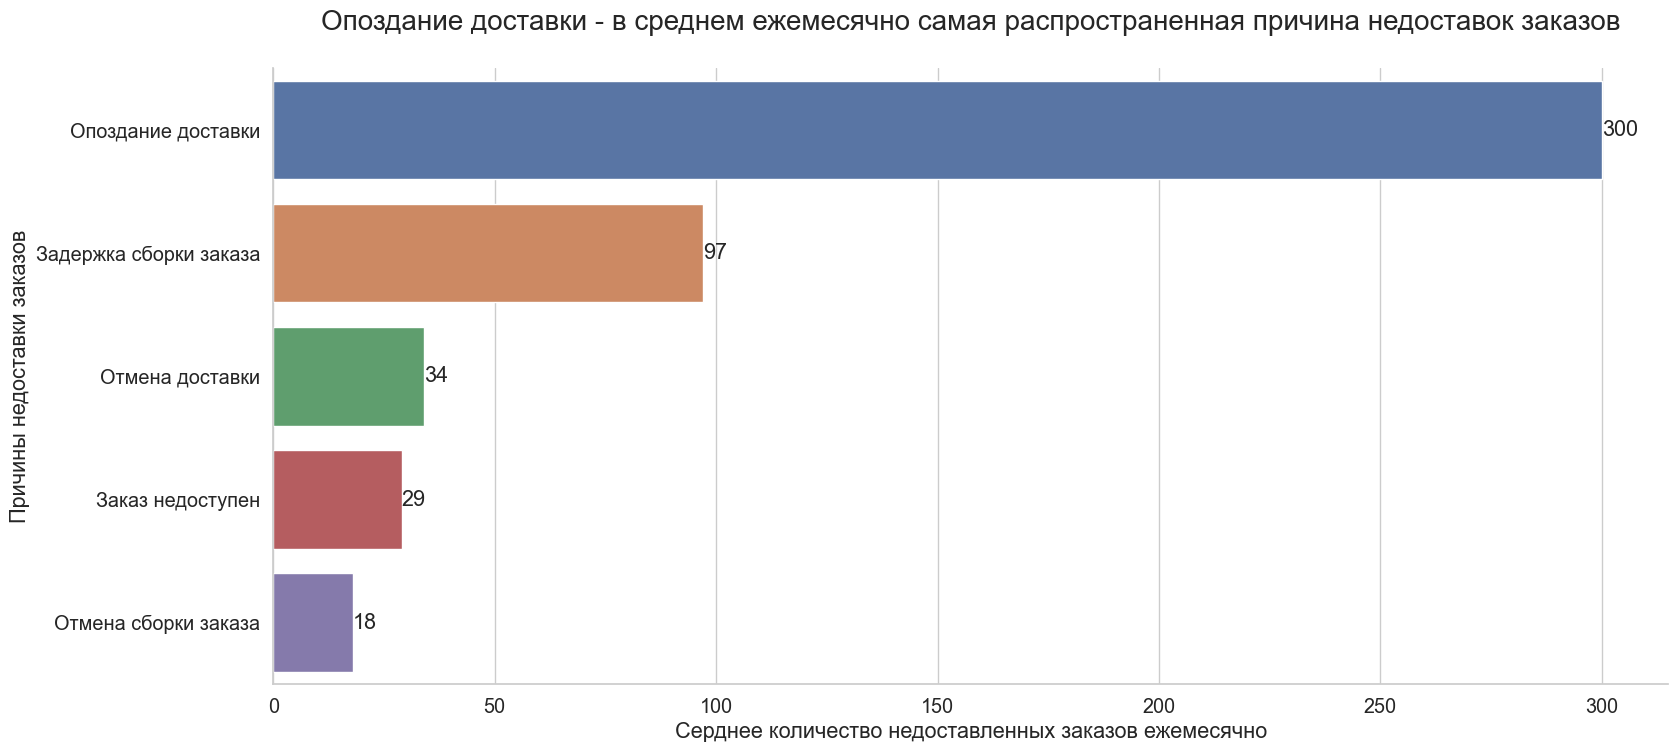

In [86]:
ax = sns.barplot(data=mean_month,
            y="Причины, по которым в среднем ежемесячно не доставлялись товары", 
            x="Недоставленные заказы")

ax.bar_label(ax.containers[0])

ax.set_ylabel('Причины недоставки заказов')
ax.set_xlabel('Серднее количество недоставленных заказов ежемесячно')
ax.set_title('Опоздание доставки - в среднем ежемесячно самая распространенная причина недоставок заказов\n', fontsize=20)
sns.despine()  # убрать часть рамки графика
plt.show()

## Ответ по задаче 2. 
**Сформирован график** с расчетом среднего количества заказов в месяц в среднем, которые не доставляются по разным причинам с детализацией по причинам 

# Задача 3. 
# По каждому товару определить, в какой день недели товар чаще всего покупается.

Объединяем датафреймы orders и order_items

In [48]:
sales = orders.merge(order_items, how="left", on="order_id")

Добавляем в объединенный датафрейм столбец с наименованием дня недели, когда произошла продажа товара

In [49]:
sales['sales_day'] = sales['order_approved_at'].dt.day_name()

Фильтруем датафрейм по наличию данных о дате оплаты

In [50]:
sales = sales.loc[sales.order_approved_at.notna()]

Формируем данные для каждого проданного товара информацию о дне недели, когда он продавался чаще всего

In [52]:
sales_days = sales.groupby(["product_id", "sales_day"], as_index=False) \
    .order_id.nunique() \
    .sort_values("order_id", ascending=False) \
    .groupby("product_id", as_index=False).first() \
    .sort_values("order_id", ascending=False) \
    .rename(columns={"product_id" : "ID товара", "sales_day" : "Самый частый день продажи", "order_id" : "Количество продаж"})

sales_days.head()

,ID товара,Самый частый день продажи,Количество продаж
22110,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,97
10865,53b36df67ebb7c41585e8d54d6772e08,Tuesday,97
19740,99a4788cb24856965c36a24e339b6058,Tuesday,78
8612,422879e10f46682990de24d770e7f83d,Tuesday,71
7363,389d119b48cf3043d311335e499d9c6b,Tuesday,61


## Ответ по задаче 3. 
**Сформирован датафрейм** с расчетом дня недели, в который чаще всего покупается товар 

# Задача 4. 
## Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Объединяем все три датафрейма в один и фильтруем его по наличию данных о дате оплаты

In [53]:
all_tables = customers \
    .merge(orders, how="left", on='customer_id') \
    .merge(order_items, how="left", on="order_id") 

all_tables = all_tables.loc[all_tables.order_approved_at.notna()]

Добавляем в объединенный датафрейм столбец с годом и месяцем покупки по каждому заказу

In [54]:
all_tables["year_month_purchases"] = all_tables["order_approved_at"].dt.to_period("M")

Вычисляем количество недель в каждом месяце соотвествующего года

In [55]:
all_tables['weeks_on_month'] = (all_tables['order_approved_at'].dt.daysinmonth / 7).round(2)

Считаем количество покупок у каждого пользователя в среднем в неделю по месяцам соотвествующих годов 

In [56]:
purchases = all_tables.groupby(['customer_unique_id', 'year_month_purchases', 'weeks_on_month'], as_index=False) \
    .order_id.nunique()

purchases = purchases \
    .assign(purchases_weekly = (purchases['order_id'] / purchases['weeks_on_month']).round(2)) \
    .sort_values(['customer_unique_id', 'year_month_purchases']) \
    .rename(columns={"customer_unique_id" : "Уникальный пользователь (УП)",
                     "year_month_purchases" : "Год и месяц покупок УП", 
                     "weeks_on_month" : "Недель в месяце", 
                     "order_id" : "Всего покупок УП в месяце", 
                     "purchases_weekly" : "Покупок УП в среднем за одну неделю месяца"})

In [59]:
purchases.head()

,Уникальный пользователь (УП),Год и месяц покупок УП,Недель в месяце,Всего покупок УП в месяце,Покупок УП в среднем за одну неделю месяца
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.23


Проверим, какие клиенты и в какие месяцы имели не менее одной покупки в неделю 

In [60]:
purchases.loc[purchases['Покупок УП в среднем за одну неделю месяца'] >= 1]

,Уникальный пользователь (УП),Год и месяц покупок УП,Недель в месяце,Всего покупок УП в месяце,Покупок УП в среднем за одну неделю месяца
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.43,6,1.35
23910,3e43e6105506432c953e165fb2acf44c,2018-02,4.00,4,1.00
62114,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4.00,4,1.00
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4.00,4,1.00


## Ответ по задаче 4. 
**Сформирован датафрейм** с расчетом среднего количества покупок у каждого из пользователей в неделю по месяцам

# Задача 5. 
## Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц

## Как формируем когорты:
- Признак формирования когорты — действие, которое объединяет людей в группу: **первая покупка**
- Размер когорты — временной интервал: **месяц**
- Отчетный период — время исследования поведения групп: **январь - декабрь 2017**. Причина: только за 2017 год имеются данные за полные 12 месяцев
- Начальный период - месяц, когда была совершена первая покупка клиентов, входящих в соотствующую когорту
- Анализируемый ключевой показатель: **Retention Rate**

## Как считаем Retention rate для каждого месяца
**Retention rate** = (количество клиентов за текущий период / количество клиентов за начальный период) x 100%


Формируем датафрейм с данными о дате первой покупка, для каждого пользователя

In [61]:
first_orders = all_tables.groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'min'}) \
    .rename(columns={"order_approved_at" : "first_order_date"})

Преобразовываем дату первой покупки в формат "год-месяц"

In [62]:
first_orders.first_order_date = first_orders.first_order_date.dt.to_period("M")

Формируем данные о размерах когорт

In [63]:
first_orders_group = first_orders.groupby('first_order_date', as_index=False) \
    .customer_unique_id.nunique() \
    .sort_values("first_order_date") \
    .rename(columns={"customer_unique_id" : "cohort_sizes"})

Для каждого пользователя добавляем информацию о его принадлежности к когорте и её размерах

In [64]:
info_groups = first_orders.merge(first_orders_group, on='first_order_date', how='left')

Добавляем данные о когортах в объеденную таблицу из трех датафреймов

In [65]:
orders_merged = all_tables.merge(info_groups, how='left', on='customer_unique_id')

В рамках когортного анализа считаем Retention rate для каждой когорты помесячно.

В расчетах делаем фильтрацию на 12 месяцев 2017 года, т.к. это единственный год в датасете, где данные есть за все 12 месяцев.

Также сделаем ограничение до 3-ого месяца, чтобы упростить восприятие данных.

In [90]:
cohorts = orders_merged.groupby(['first_order_date','year_month_purchases', 'cohort_sizes'], as_index=False) \
    .customer_unique_id.nunique() \
    .query("first_order_date >= '2017-01' and first_order_date <= '2017-12'") 

cohorts = cohorts.assign(retention_rate = (cohorts.customer_unique_id / cohorts.cohort_sizes).mul(100).round(2))
cohorts

,first_order_date,year_month_purchases,cohort_sizes,customer_unique_id,retention_rate
12,2017-01,2017-01,726,726,100.00
13,2017-01,2017-02,726,4,0.55
14,2017-01,2017-03,726,2,0.28
15,2017-01,2017-04,726,1,0.14
16,2017-01,2017-05,726,3,0.41
...,...,...,...,...,...
178,2017-12,2018-04,5638,14,0.25
179,2017-12,2018-05,5638,11,0.20
180,2017-12,2018-06,5638,9,0.16
181,2017-12,2018-07,5638,2,0.04


Переворачиваем датафрейм с когортным анализом для визуализации через Heatmap

In [91]:
cohorts_viz = cohorts.pivot(index='first_order_date', columns='year_month_purchases', values='retention_rate')

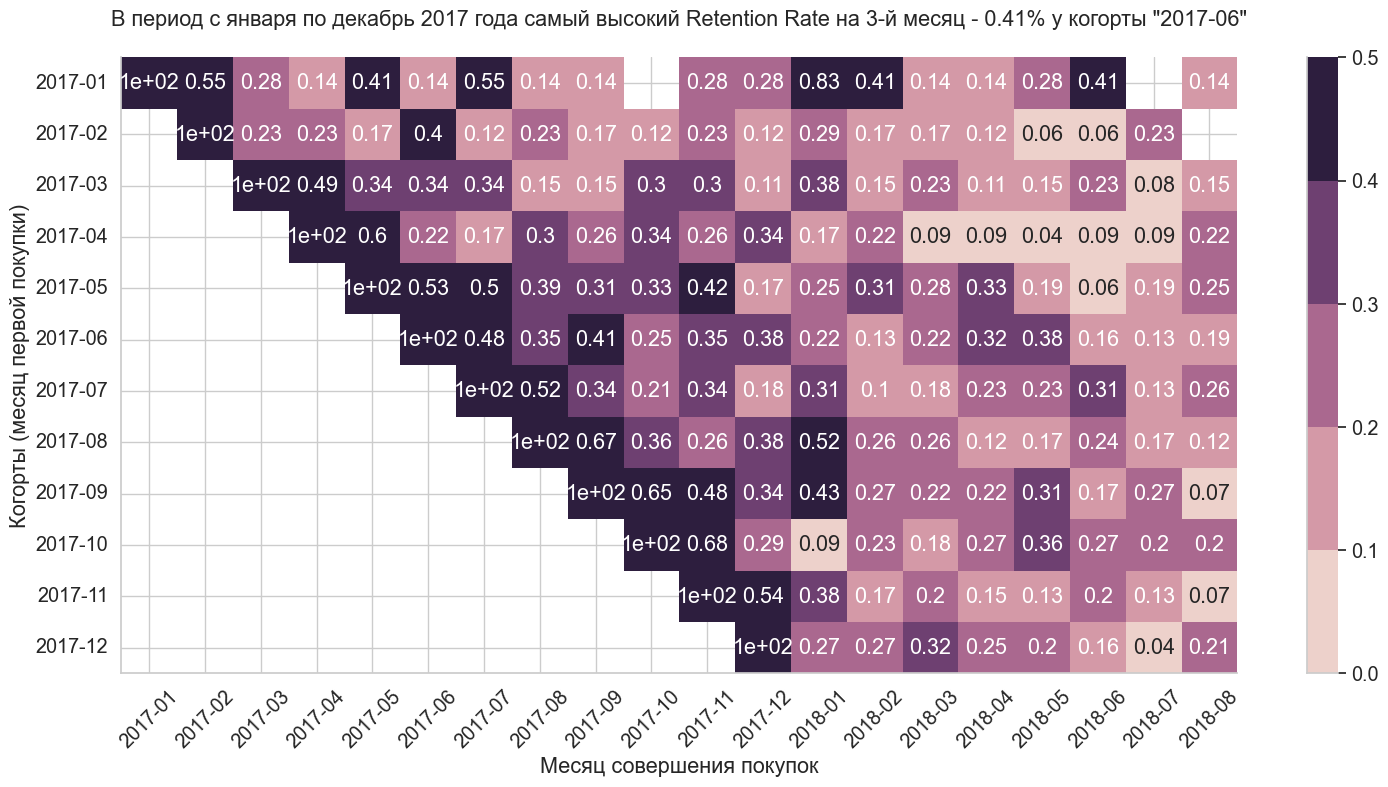

In [92]:
ax = sns.heatmap(cohorts_viz, vmin=0, vmax=0.5, annot=True, cmap=sns.cubehelix_palette(5))

ax.set_ylabel('Когорты (месяц первой покупки)')
ax.set_xlabel('Месяц совершения покупок')
ax.set_title('В период с января по декабрь 2017 года самый высокий Retention Rate на 3-й месяц - 0.41% у когорты "2017-06"\n')
plt.xticks(rotation=45)
sns.despine() # убрать часть рамки графика

## Ответ по задаче 5. 
В период с января по декабрь 2017 года самый высокий Retention Rate на 3-й месяц - **0.41% у когорты "2017-06"** 

# Задача 6. 
## Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию

# Подготовка в расчетам

Будем считать, что дата проведения RFM-анализа - на один больше после последней покупки в датасете

In [93]:
NOW = all_tables['order_approved_at'].max() + timedelta(days=1)

В процессе расчетов выявилось 590 клиентов и 595 заказов, у которых нет данных о содержании заказа, но при этом есть данные, с датой подтверждения получения оплаты.

In [94]:
test_rfm = all_tables.groupby(["customer_unique_id", "order_id", "product_id", "price"], as_index=False) \
    .product_id.count()

filter_fot_df = test_rfm.customer_unique_id.unique()

all_tables.loc[~all_tables.customer_unique_id.isin(filter_fot_df)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month_purchases,weeks_on_month
50,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,NaN,NaN,NaN,NaT,NaN,NaN,2018-03,4.43
330,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10,NaN,NaN,NaN,NaT,NaN,NaN,2017-02,4.00
422,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05,NaN,NaN,NaN,NaT,NaN,NaN,2018-05,4.43
432,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaT,NaT,2018-01-03,NaN,NaN,NaN,NaT,NaN,NaN,2017-12,4.43
627,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaT,NaT,2017-08-11,NaN,NaN,NaN,NaT,NaN,NaN,2017-07,4.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111760,c13b88bfce55305a9240404088bd6a46,d6bc315c133be9c0a334b96002b4c1c1,13060,campinas,SP,f87f3a5e91df877dc36b65fb69ff2465,unavailable,2018-07-30 21:49:41,2018-07-30 22:24:21,NaT,NaT,2018-08-10,NaN,NaN,NaN,NaT,NaN,NaN,2018-07,4.43
112085,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27,NaN,NaN,NaN,NaT,NaN,NaN,2017-09,4.29
112143,5effe9491d0f5a1c12ee4a384ec09bdf,e9429d622d9e764ca60ba01bc252b0a8,8690,suzano,SP,2b0edc4c59d83dcef85466718c36a317,unavailable,2017-09-29 19:17:10,2017-09-29 20:00:07,NaT,NaT,2017-10-17,NaN,NaN,NaN,NaT,NaN,NaN,2017-09,4.29
112517,1761db2f0d235bbfa1c281093198af0c,21c2c79d24e2d8e3496aabb1f65d85c6,20270,rio de janeiro,RJ,8b08f0e729f58529ed03e763270f78d5,unavailable,2017-08-24 21:02:47,2017-08-24 21:15:36,NaT,NaT,2017-09-27,NaN,NaN,NaN,NaT,NaN,NaN,2017-08,4.43


In [95]:
all_tables.loc[~all_tables.customer_unique_id.isin(filter_fot_df)].customer_unique_id.nunique()

590

In [96]:
all_tables.loc[~all_tables.customer_unique_id.isin(filter_fot_df)].order_id.nunique()

595

Для решения предыдущих заданий это не является помехой и убирать такие данные не нужно.

Однако для RFM-анализа такие данные необходимо убрать, т.к. для выявленных 590 клиентов не будет расчитан критерий M, из-за чего анализ будет некорректным.

Для дальнейших расчетов формируем датафрейм без выявленных 590 клиентов.

In [97]:
rfm_df = all_tables.loc[all_tables.customer_unique_id.isin(filter_fot_df)]

# Начинаем производить расчеты:

Рассчитаем новизну - R

In [98]:
r_df = rfm_df.groupby("customer_unique_id", as_index=False) \
    .order_approved_at.max()

r_df = r_df \
    .assign(Recency = r_df['order_approved_at'].apply(lambda x: (NOW - x).days)) \
    .rename(columns={"order_approved_at" : "last_invoice_date"}) \
    .sort_values("Recency")

r_df

,customer_unique_id,last_invoice_date,Recency
95070,ff22e30958c13ffe219db7d711e8f564,2018-09-03 17:40:06,1
25721,44d111bdc55faca551ef91cb74a444d8,2018-08-28 17:55:18,6
12704,21dbe8eabd00b34492a939c540e2b1a7,2018-08-29 10:35:16,6
33294,58ffbb506c34ffb731c99595589a4ebe,2018-08-28 19:10:17,6
67512,b4dcade04bc548b7e3b0243c801f8c26,2018-08-29 09:25:12,6
...,...,...,...
35753,5f7e36fb1d42d0b1c408b5b41bc52bb3,2016-10-04 13:47:06,700
68953,b8b8726af116a5cfb35b0315ecef9172,2016-10-04 10:18:57,700
43181,7390ed59fa1febbfda31a80b4318c8cb,2016-10-04 10:28:25,700
7596,14359ea0c7a105749c0a56478825b015,2016-10-04 09:43:32,700


Удаляем лишний столбец с датай последнего платежа

In [99]:
r_df = r_df.drop('last_invoice_date', axis=1)

In [100]:
r_df

,customer_unique_id,Recency
95070,ff22e30958c13ffe219db7d711e8f564,1
25721,44d111bdc55faca551ef91cb74a444d8,6
12704,21dbe8eabd00b34492a939c540e2b1a7,6
33294,58ffbb506c34ffb731c99595589a4ebe,6
67512,b4dcade04bc548b7e3b0243c801f8c26,6
...,...,...
35753,5f7e36fb1d42d0b1c408b5b41bc52bb3,700
68953,b8b8726af116a5cfb35b0315ecef9172,700
43181,7390ed59fa1febbfda31a80b4318c8cb,700
7596,14359ea0c7a105749c0a56478825b015,700


Рассчитаем частоту - F

In [101]:
f_df = rfm_df.groupby("customer_unique_id", as_index=False) \
    .order_id.nunique() \
    .rename(columns={"order_id" : "Frequency"}) \
    .sort_values("Frequency", ascending=False)

f_df

,customer_unique_id,Frequency
52592,8d50f5eadf50201ccdcedfb9e2ac8455,17
23302,3e43e6105506432c953e165fb2acf44c,9
10281,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37531,6469f99c1f9dfae7733b25662e7f1782,7
75550,ca77025e7201e3b30c44b472ff346268,7
...,...,...
32270,5657596addb4d7b07b32cd330614bdf8,1
32269,5656eb169546146caeab56c3ffc3d268,1
32268,5656a8fabc8629ff96b2bc14f8c09a27,1
32267,56560124a5cc70119deb685775639ea7,1


Рассчитываем общее число выручки с клиента - M

In [102]:
m_df = rfm_df.groupby(["customer_unique_id", "order_id", "product_id", "price"], as_index=False) \
    .product_id.count()

m_df = m_df.assign(revenue_order_id = m_df.price * m_df.product_id)

m_df = m_df.groupby("customer_unique_id", as_index=False) \
    .revenue_order_id.sum() \
    .sort_values("revenue_order_id", ascending=False) \
    .rename(columns={"revenue_order_id" : "Monetary"})

m_df

,customer_unique_id,Monetary
3799,0a0a92112bd4c708ca5fde585afaa872,13440.00
81377,da122df9eeddfedc1dc1f5349a1a690c,7388.00
44137,763c8b1c9c68a0229c42c9fc6f662b93,7160.00
82219,dc4802a71eae9be1dd28f5d788ceb526,6735.00
26015,459bef486812aa25204be022145caa62,6729.00
...,...,...
77293,cf3839da0d9492ad151690b65f45d800,2.99
70550,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29
18518,317cfc692e3f86c45c95697c61c853a6,2.20
67003,b38211bd797f4fdd81a98b9d1754b606,0.85


**Объединяем полученные результаты в один датафрейм**

In [103]:
RFM = r_df \
    .merge(f_df, on="customer_unique_id", how="left") \
    .merge(m_df, on="customer_unique_id", how="left")

RFM

,customer_unique_id,Recency,Frequency,Monetary
0,ff22e30958c13ffe219db7d711e8f564,1,2,290.00
1,44d111bdc55faca551ef91cb74a444d8,6,1,249.90
2,21dbe8eabd00b34492a939c540e2b1a7,6,1,6.90
3,58ffbb506c34ffb731c99595589a4ebe,6,1,30.00
4,b4dcade04bc548b7e3b0243c801f8c26,6,1,99.00
...,...,...,...,...
95402,5f7e36fb1d42d0b1c408b5b41bc52bb3,700,1,128.90
95403,b8b8726af116a5cfb35b0315ecef9172,700,1,21.50
95404,7390ed59fa1febbfda31a80b4318c8cb,700,1,128.90
95405,14359ea0c7a105749c0a56478825b015,700,1,32.49


Квантили для выставления диапазона оценок для каждого пользователя по каждому критерию для RFM-анализа будем использовать диапазон оценок от 1 до 5.

Это несколько усложнит работу с группами, но сделает анализ более чувствительным.

Для этого делим всех клиентов на 5 равных групп по 20% пользоваталей в каждой.

Получаем квантили для каждого критерия

In [104]:
quintiles = RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Затем я создаем функции для присвоения рангов от 1 до 5. 

Меньшее значение новизны (R) лучше, тогда как более высокие значения частоты (F) и денежного обращения (M) лучше. 

Т.е. нужно написать два функции метода.

In [105]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

Получаем оценки R, F и M каждого клиента

In [106]:
RFM['R'] = RFM['Recency'].apply(lambda x: r_score(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
RFM['M'] = RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

Объединяем оценки R, F и M в один балл RFM Score.

In [107]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score
0,ff22e30958c13ffe219db7d711e8f564,1,2,290.0,5,5,5,555
1,44d111bdc55faca551ef91cb74a444d8,6,1,249.9,5,1,5,515
2,21dbe8eabd00b34492a939c540e2b1a7,6,1,6.9,5,1,1,511
3,58ffbb506c34ffb731c99595589a4ebe,6,1,30.0,5,1,1,511
4,b4dcade04bc548b7e3b0243c801f8c26,6,1,99.0,5,1,3,513


Для концентрации на наиболее важных сегментах выделим только 10 сегментов на основе оценок R и F. Вот описание сегментов:
- **Чемпионы:**	Покупали недавно, покупают часто и тратят больше всего
- **Лояльные клиенты:**	Покупают регулярно. Отзывчивые на рекламные акции.
- **Потенциальные лоялисты:** недавние клиенты со средней частотой покупки.
- **Новые клиенты:** Покупали недавно, но не часто.
- **Многообещающие:** Покупали совсем недавно, но не потратили много.
- **Клиенты, требующие внимания:**	Давность, частота и денежная стоимость выше среднего. Хотя, возможно, купил не совсем недавно.
- **Ложатся спать:** Давность и частота ниже среднего. Потеряем их, если не активировать покупки повторно.
- **Рискованные:** Покупали часто, но давно. Надо попробовать вернуть их!
- **Могут не вернуться:** Часто покупали, но давно не возвращалась.
- **Спящие:**	Последняя покупка была давно и с небольшим количеством заказов. Могут быть потеряны.

Добавляем стоблец с описание сегментов через регулярные выражения

In [108]:
segt_map = {
    r'[1-2][1-2]': 'Спящие', # Последняя покупка была давно и с небольшим количеством заказов. Могут быть потеряны.
    r'[1-2][3-4]': 'Рискованные', # Покупали часто, но давно. Надо попробовать вернуть их!
    r'[1-2]5': 'Могут не вернуться', # Часто покупали, но давно не возвращалась.
    r'3[1-2]': 'Ложатся спать', # Давность и частота ниже среднего. Потеряем их, если не активировать покупки повторно.
    r'33': 'Клиенты, требующие внимания', # Давность, частота и денежная стоимость выше среднего. Хотя, возможно, купил не совсем недавно.
    r'[3-4][4-5]': 'Лояльные клиенты', # Покупают регулярно. Отзывчивые на рекламные акции.
    r'41': 'Многообещающие', # Покупали совсем недавно, но не потратили много.
    r'51': 'Новые клиенты', # Покупали недавно, но не часто.
    r'[4-5][2-3]': 'Потенциальные лоялисты', # Покупают регулярно. Отзывчивые на рекламные акции.
    r'5[4-5]': 'Чемпионы' # Покупали недавно, покупают часто и тратят больше всего
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,ff22e30958c13ffe219db7d711e8f564,1,2,290.00,5,5,5,555,Чемпионы
1,44d111bdc55faca551ef91cb74a444d8,6,1,249.90,5,1,5,515,Новые клиенты
2,21dbe8eabd00b34492a939c540e2b1a7,6,1,6.90,5,1,1,511,Новые клиенты
3,58ffbb506c34ffb731c99595589a4ebe,6,1,30.00,5,1,1,511,Новые клиенты
4,b4dcade04bc548b7e3b0243c801f8c26,6,1,99.00,5,1,3,513,Новые клиенты
...,...,...,...,...,...,...,...,...,...
95402,5f7e36fb1d42d0b1c408b5b41bc52bb3,700,1,128.90,1,1,4,114,Спящие
95403,b8b8726af116a5cfb35b0315ecef9172,700,1,21.50,1,1,1,111,Спящие
95404,7390ed59fa1febbfda31a80b4318c8cb,700,1,128.90,1,1,4,114,Спящие
95405,14359ea0c7a105749c0a56478825b015,700,1,32.49,1,1,1,111,Спящие


Делаем визуализации 

In [109]:
RFM_Segment = RFM.groupby(["Segment"], as_index=False) \
    .customer_unique_id.count() \
    .sort_values("customer_unique_id", ascending=False) \
    .rename(columns={"customer_unique_id" : "Segment_size"})

RFM_Segment["Segment_share"] = (RFM_Segment["Segment_size"] / RFM["Segment"].count()).mul(100).round(1)
RFM_Segment["Segment_share_roll"] = RFM_Segment["Segment_share"].cumsum()

RFM_Segment = RFM_Segment \
    .rename(columns={"Segment" : "RFM-сегмент",
                                 "Segment_size" : "Клиентов в сегменте",
                                 "Segment_share" : "Доля сегмента, %",
                                 "Segment_share_roll" : "Накопительный итог, %"})

RFM_Segment

,RFM-сегмент,Клиентов в сегменте,"Доля сегмента, %","Накопительный итог, %"
5,Спящие,36994,38.8,38.8
0,Ложатся спать,18538,19.4,58.2
4,Новые клиенты,18533,19.4,77.6
2,Многообещающие,18399,19.3,96.9
1,Лояльные клиенты,1244,1.3,98.2
3,Могут не вернуться,1043,1.1,99.3
6,Чемпионы,656,0.7,100.0


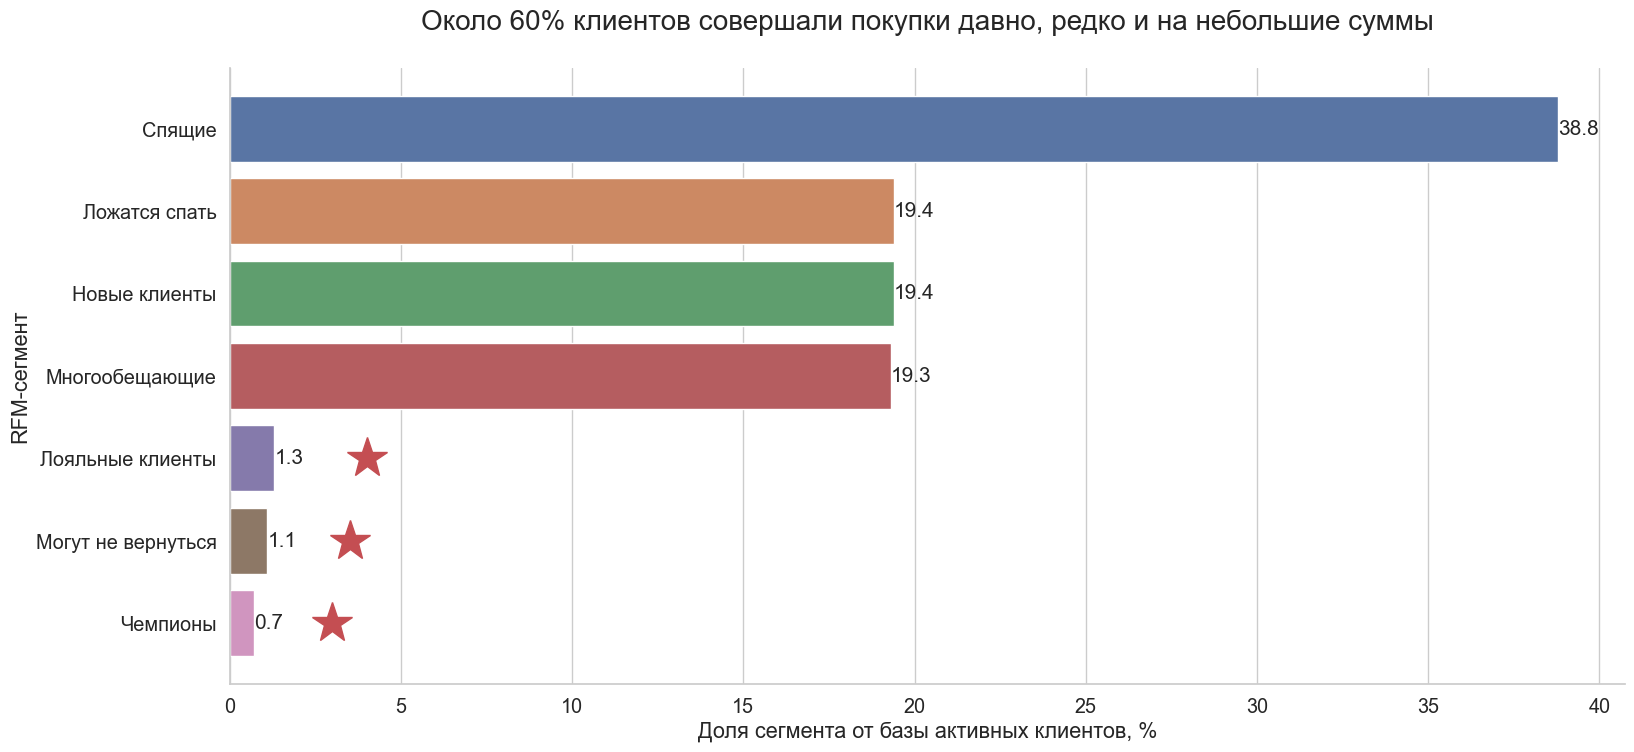

In [110]:
ax = sns.barplot(data=RFM_Segment, y="RFM-сегмент", x="Доля сегмента, %")

ax.bar_label(ax.containers[0], fontsize=15);
ax.plot(4, 4, "*", markersize=30, color="r")
ax.plot(3, 6, "*", markersize=30, color="r")
ax.plot(3.5, 5, "*", markersize=30, color="r")

ax.set_xlabel('Доля сегмента от базы активных клиентов, %')
ax.set_title('Около 60% клиентов совершали покупки давно, редко и на небольшие суммы\n', fontsize=20)
sns.despine()  # убрать часть рамки графика
plt.show()

## Ответ по задаче 6
В ходе анализа не выявились три сегмента:
- **Потенциальные лоялисты:** недавние клиенты со средней частотой покупки.
- **Клиенты, требующие внимания:** Давность, частота и денежная стоимость выше среднего. Хотя, возможно, купил не совсем недавно.
- **Рискованные:** Покупали часто, но давно. Надо попробовать вернуть их!

Результаты для нашего интернет-магазина неутешительные:
- практически 58.2% клиентов (Спящие и Ложатся спать) покупают давно, редко и на небольшие суммы. Вероятность их вернуть будет невелика
- есть задел на 38,7% клиентов (Новые клиенты и Многообещающие): если уделить им внимание, то вероятно можно будет повысить их частоту покупки и повысить средний чек.
- Крайне маленькая доля постоянных клиентов (Лояльные клиенты, Могут не вернуться, Чемпионы). Задача не потерять тех, кто есть в эимх группах и пополнять группы новыми пользователями.